Custom Module for softmax

In [ ]:
import torch.nn as nn
import torch

In [ ]:
torch.manual_seed(1)

In [ ]:
class softmax(nn.Module):
  def __init__(self,in_size,out_size):
    super(softmax,self).__init__()
    self.linear = nn.Linear(in_size,out_size)
  def forward(self,x):
    out = self.linear(x)
    return out

In [ ]:
x = torch.tensor([[1.0,2.0]])

In [ ]:
model = softmax(2,3)

In [ ]:
y = model(x)
y

tensor([[ 0.8316, -1.0836, -0.3070]], grad_fn=<AddmmBackward0>)

In [ ]:
yhat = y.max(1)
yhat

torch.return_types.max(
values=tensor([0.8316], grad_fn=<MaxBackward0>),
indices=tensor([0]))

In [ ]:
_, yhat = y.max(1)
yhat

tensor([0])

working with some data

In [ ]:
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Create class for plotting

def plot_data(data_set, model = None, n = 1, color = False):
    X = data_set[:][0]
    Y = data_set[:][1]
    plt.plot(X[Y == 0, 0].numpy(), Y[Y == 0].numpy(), 'bo', label = 'y = 0')
    plt.plot(X[Y == 1, 0].numpy(), 0 * Y[Y == 1].numpy(), 'ro', label = 'y = 1')
    plt.plot(X[Y == 2, 0].numpy(), 0 * Y[Y == 2].numpy(), 'go', label = 'y = 2')
    plt.ylim((-0.1, 3))
    plt.legend()
    if model != None:
        w = list(model.parameters())[0][0].detach()
        b = list(model.parameters())[1][0].detach()
        y_label = ['yhat=0', 'yhat=1', 'yhat=2']
        y_color = ['b', 'r', 'g']
        Y = []
        for w, b, y_l, y_c in zip(model.state_dict()['0.weight'], model.state_dict()['0.bias'], y_label, y_color):
            Y.append((w * X + b).numpy())
            plt.plot(X.numpy(), (w * X + b).numpy(), y_c, label = y_l)
        if color == True:
            x = X.numpy()
            x = x.reshape(-1)
            top = np.ones(x.shape)
            y0 = Y[0].reshape(-1)
            y1 = Y[1].reshape(-1)
            y2 = Y[2].reshape(-1)
            plt.fill_between(x, y0, where = y1 > y1, interpolate = True, color = 'blue')
            plt.fill_between(x, y0, where = y1 > y2, interpolate = True, color = 'blue')
            plt.fill_between(x, y1, where = y1 > y0, interpolate = True, color = 'red')
            plt.fill_between(x, y1, where = ((y1 > y2) * (y1 > y0)),interpolate = True, color = 'red')
            plt.fill_between(x, y2, where = (y2 > y0) * (y0 > 0),interpolate = True, color = 'green')
            plt.fill_between(x, y2, where = (y2 > y1), interpolate = True, color = 'green')
    plt.legend()
    plt.show()

In [ ]:
torch.manual_seed(0)

In [ ]:
from torch.utils.data import Dataset,DataLoader
import torch.optim as optim

In [ ]:
# Create the data class

class Data(Dataset):

    # Constructor
    def __init__(self):
        self.x = torch.arange(-2, 2, 0.1).view(-1, 1)
        self.y = torch.zeros(self.x.shape[0])
        self.y[(self.x > -1.0)[:, 0] * (self.x < 1.0)[:, 0]] = 1
        self.y[(self.x >= 1.0)[:, 0]] = 2
        self.y = self.y.type(torch.LongTensor)
        self.len = self.x.shape[0]

    # Getter
    def __getitem__(self,index):
        return self.x[index], self.y[index]

    # Get Length
    def __len__(self):
        return self.len

torch.Size([40, 1])


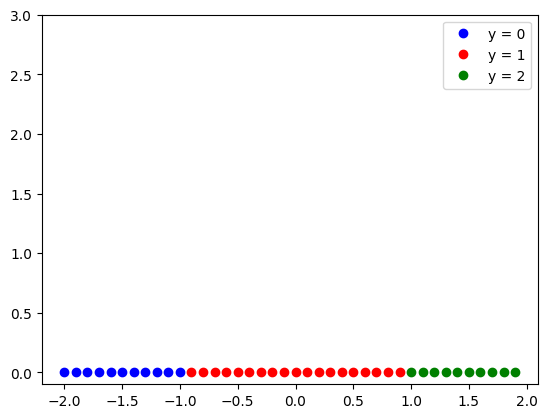

In [ ]:
# Create the dataset object and plot the dataset object

data_set = Data()
print(data_set.x.shape)
plot_data(data_set)

In [ ]:
model_a = nn.Sequential(nn.Linear(1,3))
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0198],
                      [ 0.7929],
                      [-0.0887]])),
             ('0.bias', tensor([ 0.2646, -0.3022, -0.1966]))])

In [ ]:
trainloader = DataLoader(dataset=data_set,batch_size=5)
optimizer = optim.SGD(model_a.parameters(),lr=0.01)
criterion = nn.CrossEntropyLoss()

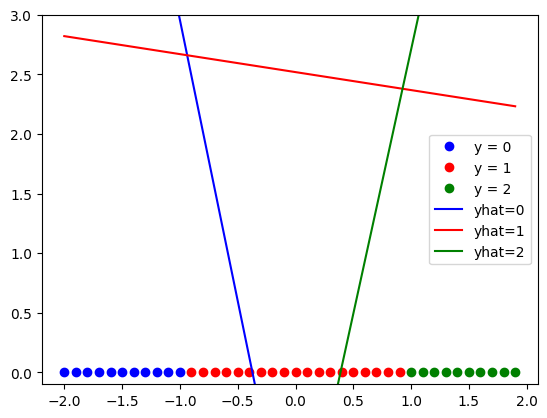

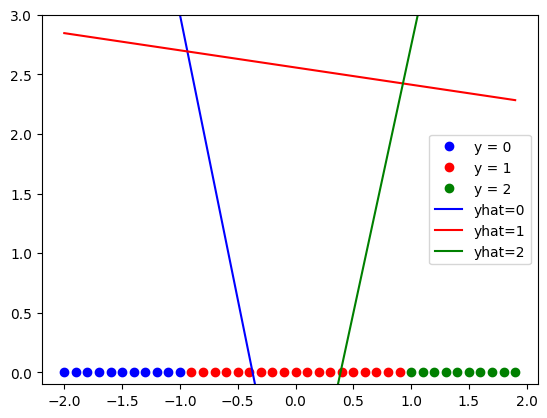

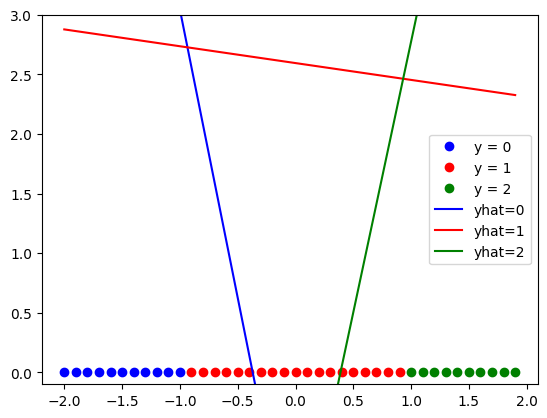

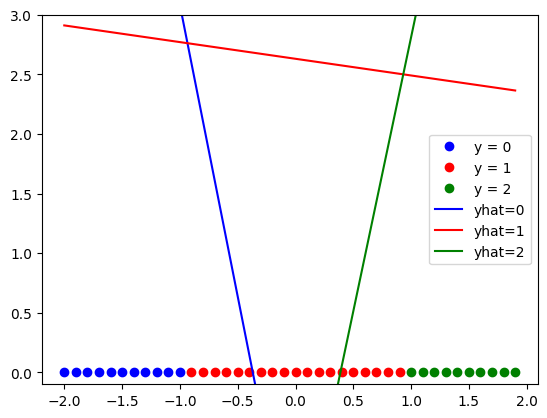

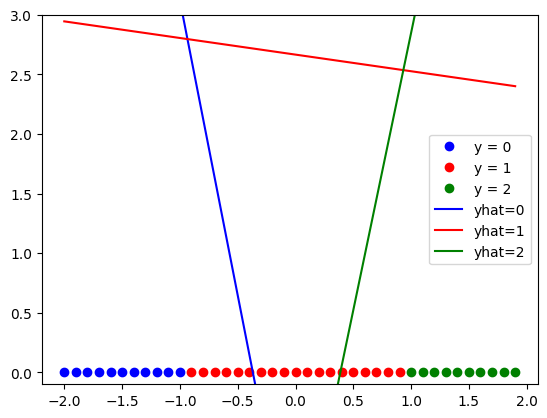

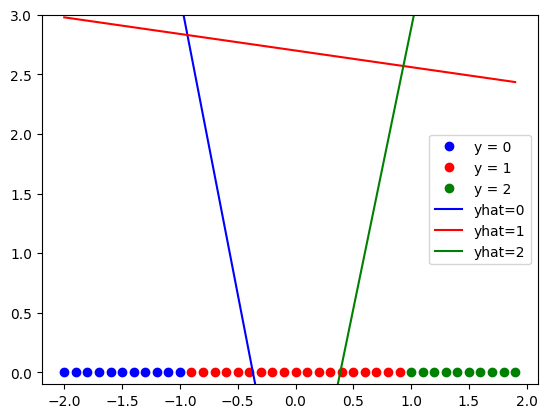

In [ ]:
LOSS = []
epoches = 300
for epoch in range(epoches):
  if epoch % 50 == 0:
    plot_data(data_set, model_a)
  for x,y in trainloader:
    optimizer.zero_grad()
    yhat = model_a(x)
    loss = criterion(yhat,y)
    LOSS.append(loss.item())
    loss.backward()
    optimizer.step()


In [ ]:
z =  model_a(data_set.x)
_, yhat = z.max(1)
print("The prediction:", yhat)

The prediction: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])


In [ ]:
# Print the accuracy

correct = (data_set.y == yhat).sum().item()
accuracy = correct / len(data_set)
print("The accuracy: ", accuracy)

The accuracy:  1.0


Working on MNIST dataset for better understanding of the classification of handwritten digits.

In [16]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transformers
import matplotlib.pyplot as plt

In [14]:
# Plot the data

def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.title('y = ' + str(data_sample[1]))

In [4]:
train_dataset = dsets.MNIST(root='./data',train=True,download=True,transform=transformers.ToTensor())

100%|██████████| 9.91M/9.91M [00:00<00:00, 37.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.06MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.46MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.58MB/s]


In [7]:
validation_dataset = dsets.MNIST(root='./data',train=False,download=True,transform=transformers.ToTensor())

In [11]:
train_dataset[0][1]

5

In [12]:
validation_dataset[0][1]

7

The image:  None


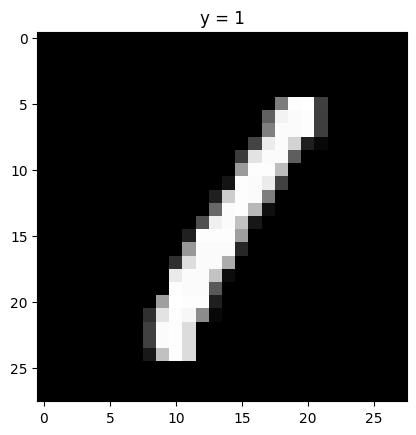

In [15]:
print("The image: ", show_data(train_dataset[3]))

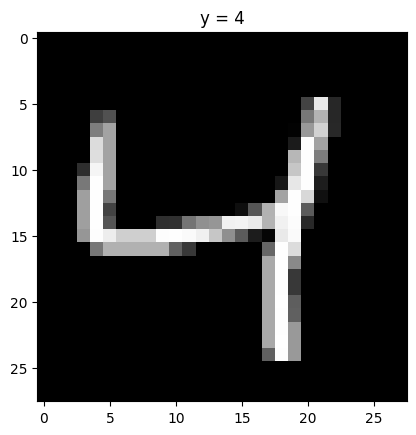

In [17]:
show_data(train_dataset[2])

In [18]:
class softmax(nn.Module):
  def __init__(self,in_size,out_size):
    super(softmax,self).__init__()
    self.linear = nn.Linear(in_size,out_size)
  def forward(self,x):
    out = self.linear(x)
    return out

In [19]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [20]:
input_size = 28*28
output_size = 10

In [21]:
model_softmax = softmax(input_size,output_size)

In [29]:
print(list(model_softmax.parameters())[0].shape)

torch.Size([10, 784])


In [30]:
print(list(model_softmax.parameters())[1].shape)

torch.Size([10])


In [31]:
import torch.optim as optim

In [32]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_softmax.parameters(),lr=0.1)

In [33]:
from torch.utils.data import DataLoader

In [34]:
trainloader = DataLoader(dataset = train_dataset,batch_size=100)
validationloader = DataLoader(dataset=validation_dataset,batch_size=5000)

In [42]:
epoches = 10
accuracy_list = []
loss_list = []

In [43]:
for epoch in range(epoches):
  for x,y in trainloader:
    optimizer.zero_grad()
    z = model_softmax(x.view(-1,28*28))
    loss = criterion(z,y)
    loss.backward()
    optimizer.step()
  correct = 0
  for x_valid,y_valid in validationloader:
    z = model_softmax(x_valid.view(-1,28*28))
    _,yhat = z.max(1)
    correct = correct + (yhat == y_valid).sum().item()
  accuracy = correct / len(validation_dataset)
  accuracy_list.append(accuracy)
  loss_list.append(loss.data)

In [44]:
# The function to plot parameters

def PlotParameters(model):
    W = model.state_dict()['linear.weight'].data
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(2, 5)
    fig.subplots_adjust(hspace=0.01, wspace=0.1)
    for i, ax in enumerate(axes.flat):
        if i < 10:

            # Set the label for the sub-plot.
            ax.set_xlabel("class: {0}".format(i))

            # Plot the image.
            ax.imshow(W[i, :].view(28, 28), vmin=w_min, vmax=w_max, cmap='seismic')

            ax.set_xticks([])
            ax.set_yticks([])

        # Ensure the plot is shown correctly with multiple plots
        # in a single Notebook cell.
    plt.show()

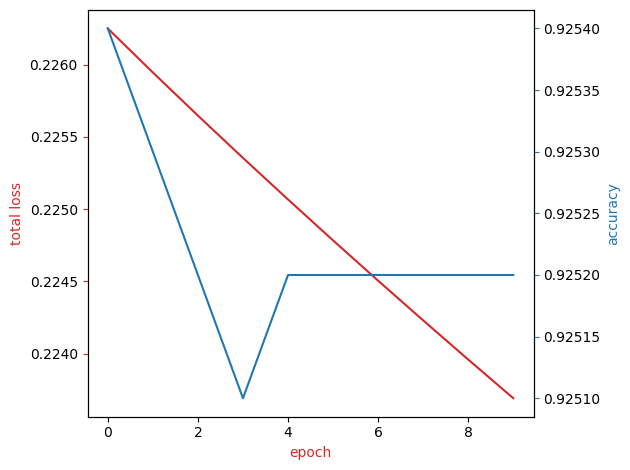

In [45]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

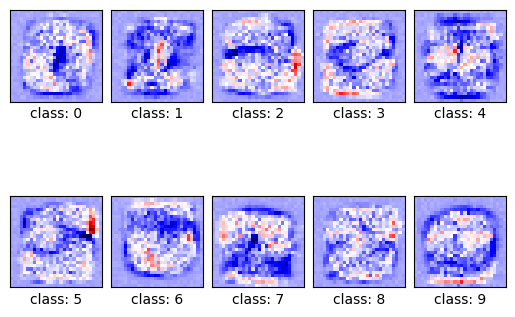

In [47]:
# Plot the parameters

PlotParameters(model_softmax)

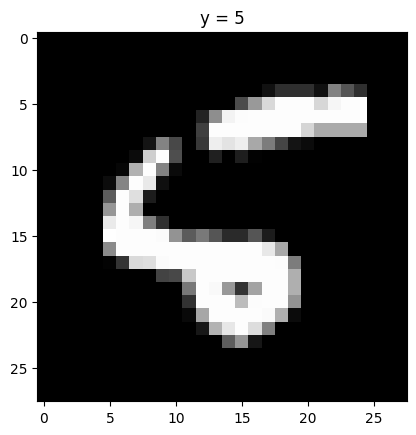

yhat: tensor([6])
probability of class  0.9985577464103699


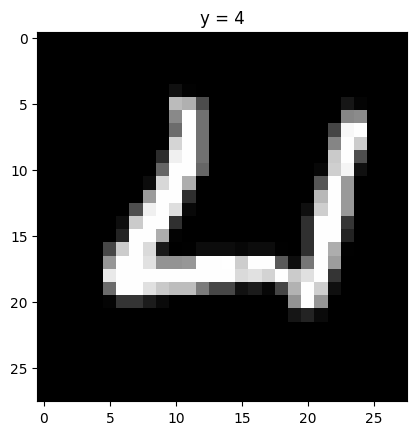

yhat: tensor([6])
probability of class  0.5951755046844482


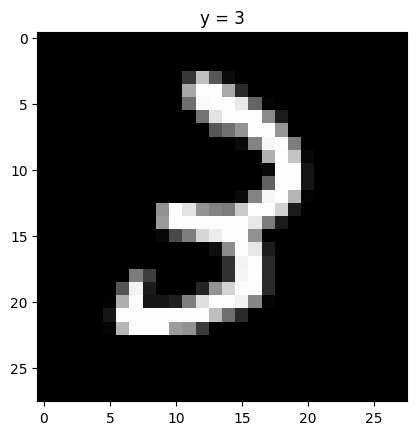

yhat: tensor([2])
probability of class  0.7823955416679382


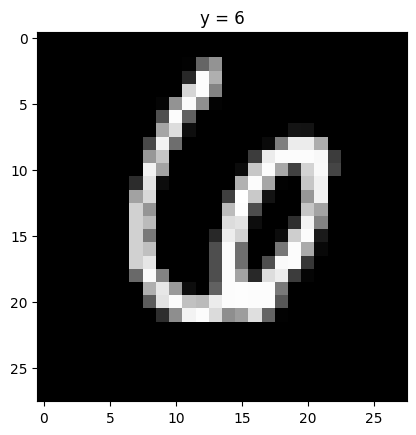

yhat: tensor([2])
probability of class  0.3127296566963196


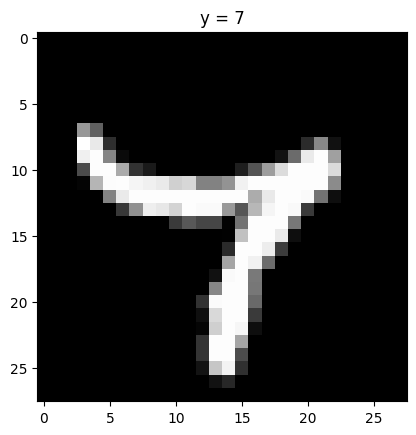

yhat: tensor([4])
probability of class  0.605483889579773


In [49]:
# Plot the misclassified samples
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model_softmax(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat != y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break

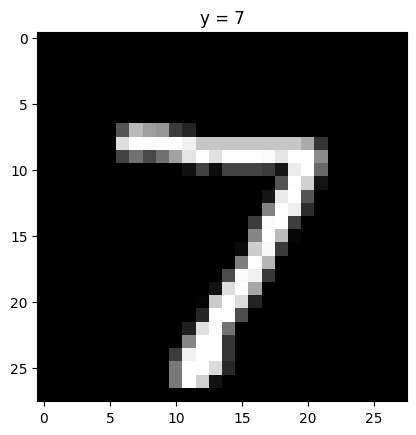

yhat: tensor([7])
probability of class  0.9974855184555054


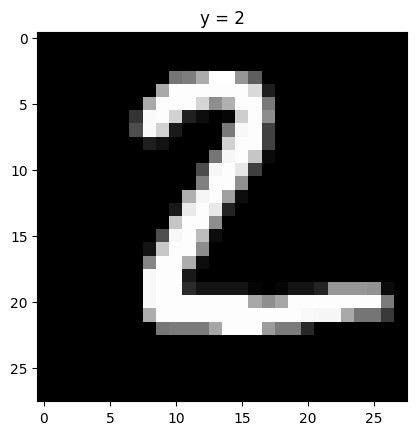

yhat: tensor([2])
probability of class  0.9915762543678284


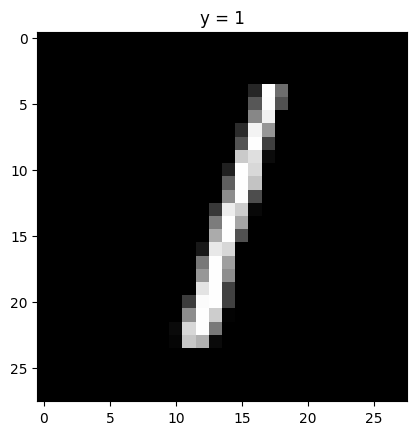

yhat: tensor([1])
probability of class  0.9833662509918213


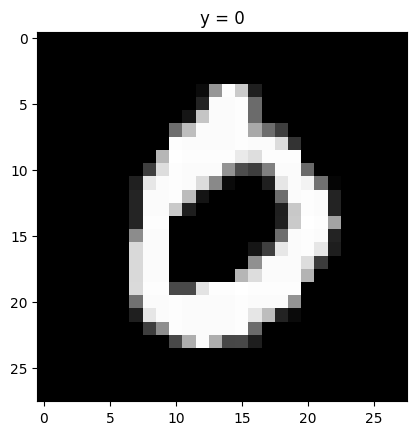

yhat: tensor([0])
probability of class  0.9999160766601562


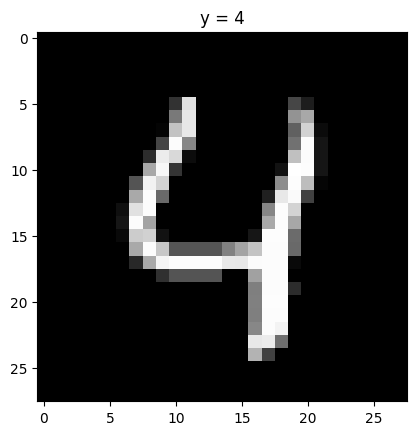

yhat: tensor([4])
probability of class  0.9683379530906677


In [50]:
# Plot the classified samples
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model_softmax(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat == y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break